# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import math
%matplotlib inline

# Loading the data:

In [2]:
df=pd.read_csv(r"C:\Users\HP\Documents\DS INTERNSHIP\Amazon Sales data.csv",parse_dates=['Order Date','Ship Date'])
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Analysing and preprocessing:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [13]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [14]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [4]:
categorical_columns=[col for col in df.columns if df[col].dtype in['O','Object']]
categorical_columns

['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

In [5]:
numerical_columns=[col for col in df.columns if df[col].dtype not in ['O','Object']]
numerical_columns

['Order Date',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [3]:
df.drop('Order ID',axis='columns',inplace=True)

In [6]:
for col in categorical_columns:
    print('COLUMN NAME: ',col)
    print(df[col].value_counts())
    print('\n')

COLUMN NAME:  Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: Region, dtype: int64


COLUMN NAME:  Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: Country, Length: 76, dtype: int64


COLUMN NAME:  Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: Item Type, dtyp

In [7]:
df['Order Date']=pd.to_datetime(df['Order Date'],yearfirst=True)
df['Ship Date']=pd.to_datetime(df['Ship Date'], yearfirst=True)

In [8]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [9]:
df['Ord_Yr']=pd.to_datetime(df['Order Date']).dt.year
df['Ord_Mon']=pd.to_datetime(df['Order Date']).dt.month
df['Ord_Date']=pd.to_datetime(df['Order Date']).dt.day

In [10]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Ord_Yr,Ord_Mon,Ord_Date
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1


In [11]:
df['Ship_Yr']=pd.to_datetime(df['Ship Date']).dt.year
df['Ship_Mon']=pd.to_datetime(df['Ship Date']).dt.month
df['Ship_Date']=pd.to_datetime(df['Ship Date']).dt.day

In [12]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Ord_Yr,Ord_Mon,Ord_Date,Ship_Yr,Ship_Mon,Ship_Date
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28,2010,6,27
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22,2012,9,15
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,2014,5,8
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20,2014,7,5
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1,2013,2,6


In [13]:
df['Item Type'].value_counts()

Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: Item Type, dtype: int64

In [14]:
df['Sales Channel'].value_counts()

Offline    50
Online     50
Name: Sales Channel, dtype: int64

In [15]:
df['Region'].value_counts()

Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: Region, dtype: int64

## Yearly sales:

## Sales trend by year:

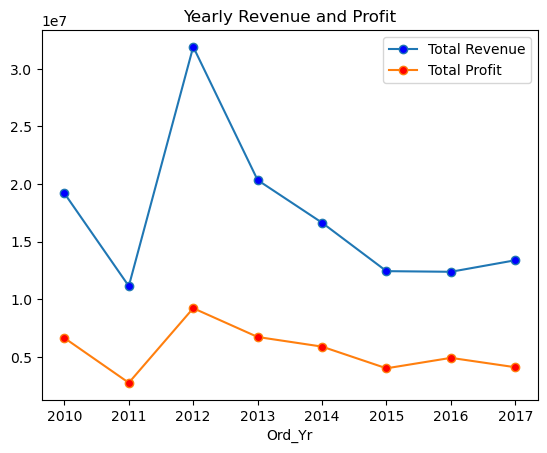

In [29]:
(df.groupby('Ord_Yr')['Total Revenue'].sum()).plot(kind='line',marker='o',mfc='b')
(df.groupby('Ord_Yr')['Total Profit'].sum()).plot(kind='line',marker='o',mfc='r')
plt.legend()
plt.title('Yearly Revenue and Profit')
plt.show()

## Item Type vs Yearly Revenue:

In [17]:
df1=df.groupby(['Ord_Yr','Item Type'])['Total Revenue'].sum().sort_values(ascending=False).reset_index()
df1

,Ord_Yr,Item Type,Total Revenue
0,2013,Cosmetics,11248281.60
1,2016,Cosmetics,9753057.60
2,2012,Office Supplies,9105218.22
3,2012,Household,8374759.64
4,2010,Cosmetics,6620956.80
...,...,...,...
57,2011,Fruits,93775.83
58,2010,Fruits,54319.26
59,2010,Personal Care,22312.29
60,2015,Fruits,6279.09


In [18]:
df2=df.groupby(['Ord_Yr','Item Type'])['Total Profit'].sum().sort_values(ascending=False).reset_index()
df2

,Ord_Yr,Item Type,Total Profit
0,2013,Cosmetics,4473327.36
1,2016,Cosmetics,3878691.96
2,2010,Cosmetics,2633087.28
3,2012,Household,2076928.36
4,2012,Office Supplies,1765227.50
...,...,...,...
57,2011,Fruits,24222.91
58,2010,Fruits,14031.02
59,2010,Personal Care,6841.38
60,2015,Fruits,1621.93


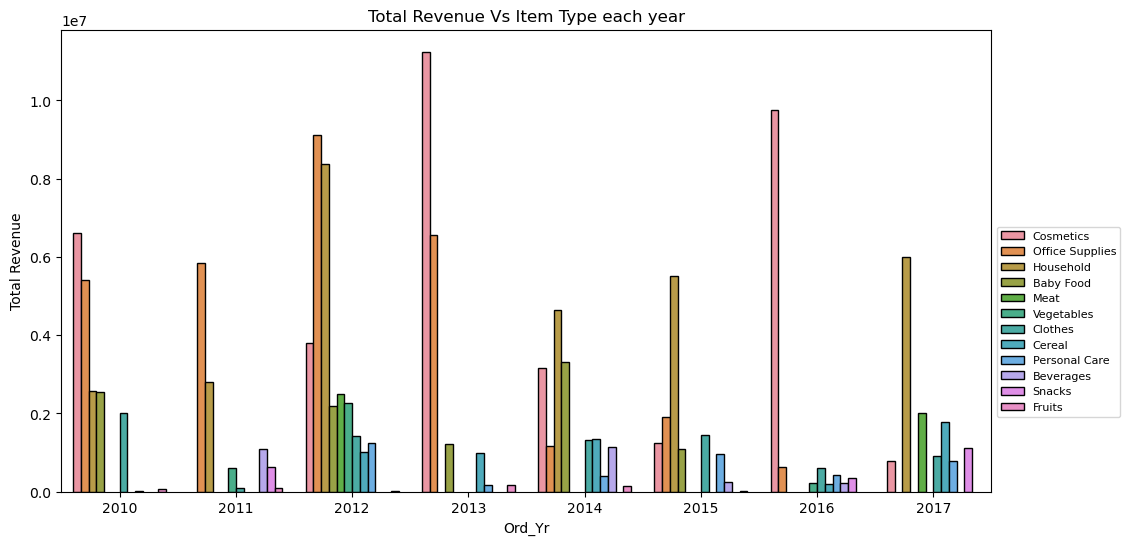

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df1,x='Ord_Yr',y='Total Revenue',hue='Item Type',ci=100,edgecolor='k')
plt.legend(bbox_to_anchor=(1.0, 0.15),loc='lower left',fontsize=8)
plt.title('Total Revenue Vs Item Type each year')
plt.show()

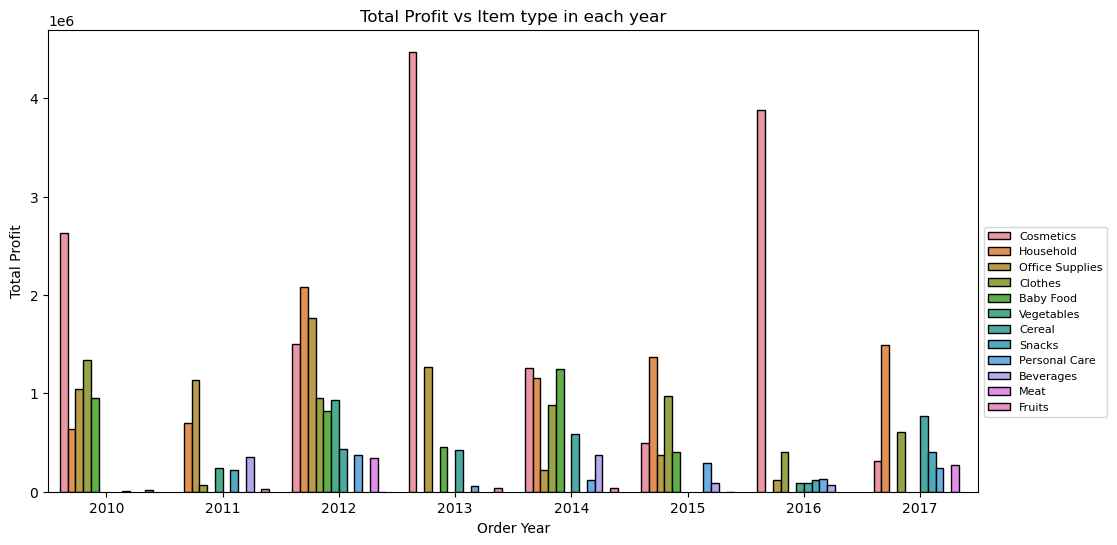

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data=df2,x='Ord_Yr',y='Total Profit',hue='Item Type',ci=100,edgecolor='k')
plt.legend(bbox_to_anchor=(1.0, 0.15),loc='lower left',fontsize=8)
plt.title('Total Profit vs Item type in each year')
plt.xlabel('Order Year')
plt.show()

## Region Vs YearlySales:

In [22]:
g1=df.groupby(df['Region'])
df_g1=g1.get_group('Sub-Saharan Africa')

g2=df.groupby(df['Region'])
df_g2=g2.get_group('Europe')

g3=df.groupby(df['Region'])
df_g3=g3.get_group('Australia and Oceania')

g4=df.groupby(df['Region'])
df_g4=g4.get_group('Asia')

g5=df.groupby(df['Region'])
df_g5=g5.get_group('Middle East and North Africa')

g6=df.groupby(df['Region'])
df_g6=g6.get_group('Central America and the Caribbean')

g7=df.groupby(df['Region'])
df_g7=g7.get_group('North America')

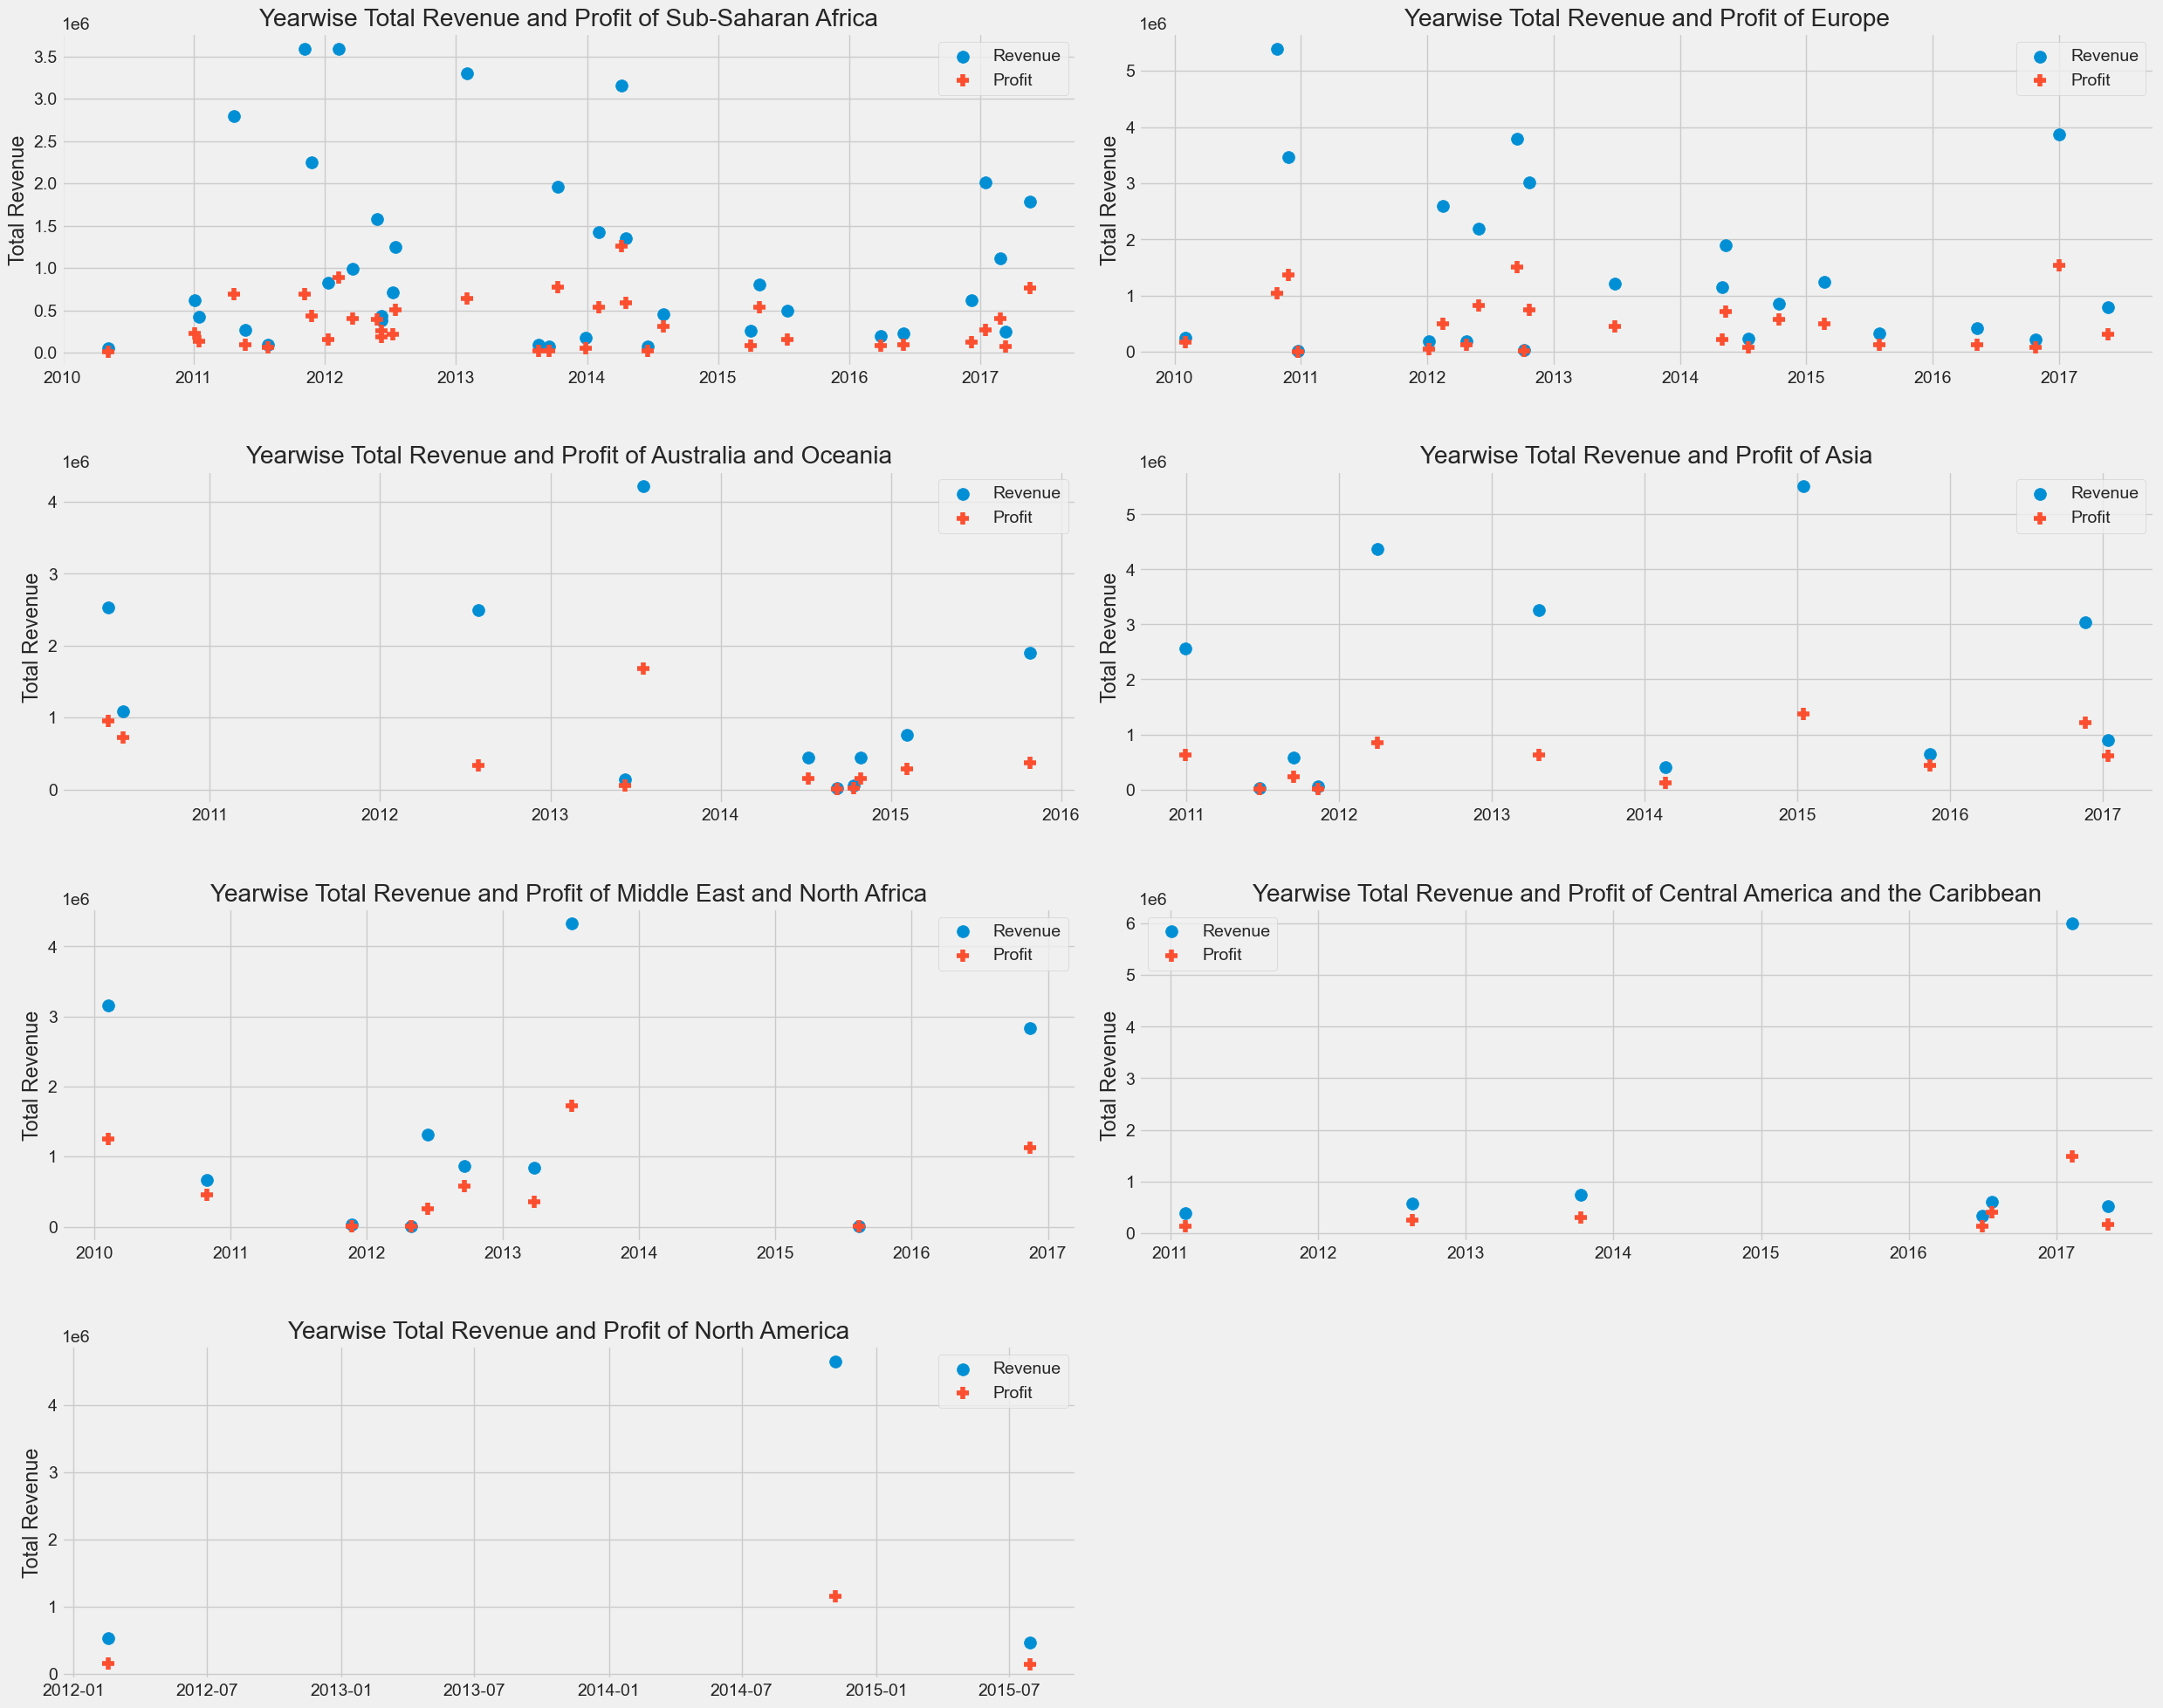

In [23]:
region_list=[df_g1,df_g2,df_g3,df_g4,df_g5,df_g6,df_g7]
region_name=["Sub-Saharan Africa","Europe","Australia and Oceania","Asia","Middle East and North Africa","Central America and the Caribbean","North America"]
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,20))
plt.subplots_adjust(top=1.25,bottom=1.2)
for i,region in enumerate(region_list,1):
    plt.subplot(math.ceil(len(region_list)/2),2,i)
    plt.scatter(region['Order Date'],region["Total Revenue"],marker='o',s=(100),label='Revenue')
    plt.scatter(region['Order Date'],region["Total Profit"],marker='+',s=(100),label='Profit')
    plt.ylabel("Total Revenue")
    plt.xlabel(None)
    plt.legend()
    plt.title(f"Yearwise Total Revenue and Profit of {region_name[i-1]}")
plt.tight_layout()
plt.show()


# Sales Trend by Month:

In [24]:
monthly_sales=df.groupby('Ord_Mon')['Total Revenue'].sum().reset_index()
monthly_sales

,Ord_Mon,Total Revenue
0,1,10482467.12
1,2,24740517.77
2,3,2274823.87
3,4,16187186.33
4,5,13215739.99
5,6,5230325.77
6,7,15669518.50
7,8,1128164.91
8,9,5314762.56
9,10,15287576.61


In [25]:
max_sales_month=monthly_sales.loc[monthly_sales['Total Revenue'].idxmax()]
max_sales_month

Ord_Mon                 2.00
Total Revenue    24740517.77
Name: 1, dtype: float64

In [26]:
min_sales_month=monthly_sales.loc[monthly_sales['Total Revenue'].idxmin()]
min_sales_month

Ord_Mon                8.00
Total Revenue    1128164.91
Name: 7, dtype: float64

In [27]:
monthly_salesp=df.groupby('Ord_Mon')['Total Profit'].sum().reset_index()
monthly_salesp

,Ord_Mon,Total Profit
0,1,2816857.02
1,2,7072050.51
2,3,928351.06
3,4,4760208.35
4,5,4582692.30
5,6,2185379.43
6,7,5578463.06
7,8,579276.67
8,9,2344166.03
9,10,4506923.25


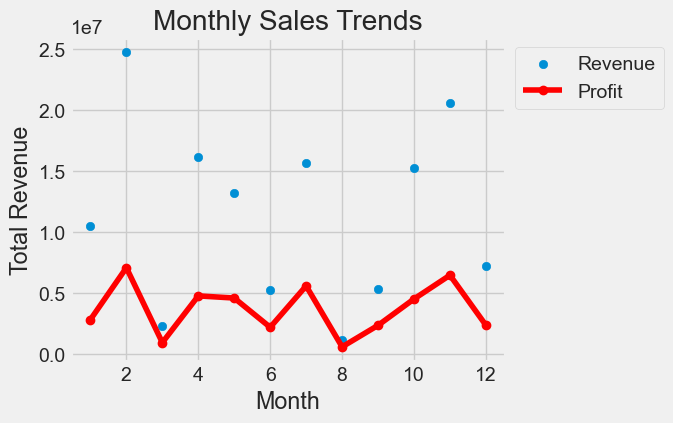

In [28]:
plt.figure(figsize=(5,4))
plt.scatter(x=monthly_sales['Ord_Mon'],y=monthly_sales['Total Revenue'],marker='o',label='Revenue')
plt.plot(monthly_salesp['Ord_Mon'],monthly_salesp['Total Profit'],marker='o',color='r',label='Profit')
plt.title('Monthly Sales Trends')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

## Monthly Product Sales:

In [29]:
#Item Type:
items=pd.DataFrame(df[['Units Sold','Total Revenue','Item Type','Ord_Mon','Region']].groupby('Ord_Mon')['Item Type'].value_counts())
items

Item Type
Ord_Mon Item Type                 
1       Household                2
        Beverages                1
        Clothes                  1
        Meat                     1
        Office Supplies          1
...                            ...
11      Household                1
12      Personal Care            2
        Cosmetics                1
        Household                1
        Office Supplies          1

[69 rows x 1 columns]

In [30]:
items['No. of items']=items['Item Type']
items.drop('Item Type',inplace=True,axis=1)
items=items.reset_index()
items

,Ord_Mon,Item Type,No. of items
0,1,Household,2
1,1,Beverages,1
2,1,Clothes,1
3,1,Meat,1
4,1,Office Supplies,1
...,...,...,...
64,11,Household,1
65,12,Personal Care,2
66,12,Cosmetics,1
67,12,Household,1


In [31]:
items=items.pivot_table(values=['No. of items'],index=['Ord_Mon'],columns=['Item Type'],aggfunc=np.sum)
items

No. of items                                                      \
Item Type    Baby Food Beverages Cereal Clothes Cosmetics Fruits Household   
Ord_Mon                                                                      
1                  NaN       1.0    NaN     1.0       NaN    NaN       2.0   
2                  2.0       1.0    NaN     1.0       2.0    NaN       2.0   
3                  NaN       NaN    2.0     NaN       NaN    NaN       NaN   
4                  NaN       1.0    1.0     2.0       1.0    1.0       1.0   
5                  3.0       1.0    1.0     NaN       1.0    1.0       1.0   
6                  1.0       NaN    2.0     2.0       NaN    1.0       NaN   
7                  1.0       2.0    NaN     2.0       2.0    NaN       NaN   
8                  NaN       NaN    1.0     1.0       NaN    2.0       NaN   
9                  NaN       NaN    NaN     1.0       1.0    2.0       NaN   
10                 NaN       2.0    NaN     2.0       2.0    1.0       1.0   
11                 NaN       NaN    NaN     1.0       3.0    2.0       1.0   
12                 NaN       NaN    NaN     NaN       1.0    NaN       1.0   

                                                                
Item Type Meat Office Supplies Personal Care Snacks Vegetables  
Ord_Mon                                                         
1          1.0             1.0           NaN    1.0        NaN  
2          NaN             2.0           2.0    1.0        NaN  
3          NaN             NaN           1.0    NaN        1.0  
4          NaN             2.0           NaN    NaN        NaN  
5          NaN             1.0           2.0    NaN        NaN  
6          NaN             1.0           NaN    1.0        2.0  
7          1.0             NaN           3.0    NaN        1.0  
8          NaN             NaN           NaN    NaN        NaN  
9          NaN             NaN           NaN    NaN        1.0  
10         NaN             2.0           NaN    NaN        1.0  
11         NaN             2.0           NaN    NaN        NaN  
12         NaN             1.0           2.0    NaN        NaN

<Figure size 2000x1200 with 0 Axes>

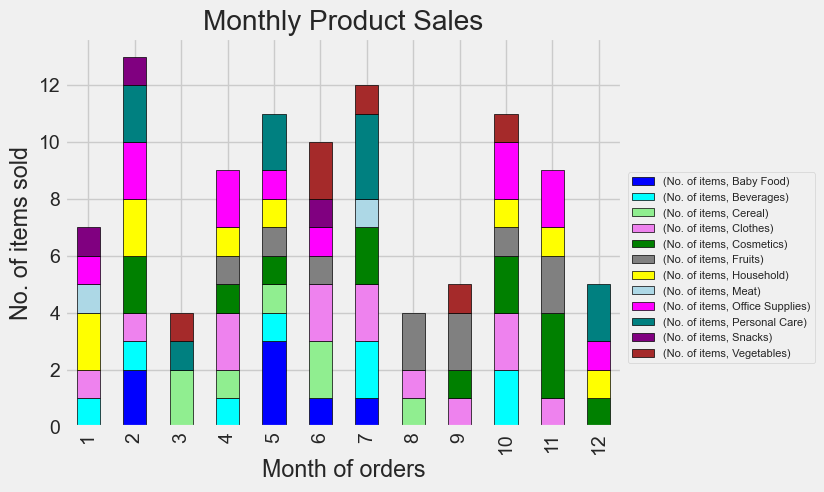

In [32]:
plt.figure(figsize=(20,12))
color=['blue','cyan','lightgreen','violet','green','grey','yellow','lightblue','magenta','teal','purple','brown']
items.plot(kind='bar',ylabel='No. of items sold',title='Monthly Product Sales',stacked=True,color= color,edgecolor='k',xlabel='Month of orders')
plt.legend(bbox_to_anchor=(1.0, 0.15),loc='lower left',fontsize=8)

# Sales Trend Yearly Monthwise :

In [33]:
yr_monthly_sales=df.groupby(['Ord_Yr','Ord_Mon'])['Total Revenue'].sum().reset_index()
yr_monthly_sales.head()

,Ord_Yr,Ord_Mon,Total Revenue
0,2010,2,3410661.12
1,2010,5,2587973.26
2,2010,6,1082418.40
3,2010,10,6064933.75
4,2010,11,3458252.00


In [34]:
yr_monthly_salesp=df.groupby(['Ord_Yr','Ord_Mon'])['Total Profit'].sum().reset_index()
yr_monthly_salesp.head()

,Ord_Yr,Ord_Mon,Total Profit
0,2010,2,1424410.94
1,2010,5,965441.52
2,2010,6,727423.20
3,2010,10,1495392.79
4,2010,11,1375311.70


In [35]:
max_sales_yr_month=yr_monthly_sales.loc[yr_monthly_sales['Total Revenue'].idxmax()]
max_sales_yr_month

Ord_Yr              2013.0
Ord_Mon                7.0
Total Revenue    8545511.2
Name: 28, dtype: float64

In [37]:
min_sales_yr_month=yr_monthly_sales.loc[yr_monthly_sales['Total Revenue'].idxmin()]
min_sales_yr_month

Ord_Yr           2015.00
Ord_Mon             8.00
Total Revenue    6279.09
Name: 46, dtype: float64

In [38]:
maxp_sales_yr_month=yr_monthly_salesp.loc[yr_monthly_salesp['Total Profit'].idxmax()]
maxp_sales_yr_month

Ord_Yr             2013.00
Ord_Mon               7.00
Total Profit    3398463.02
Name: 28, dtype: float64

In [39]:
minp_sales_yr_month=yr_monthly_salesp.loc[yr_monthly_salesp['Total Profit'].idxmin()]
minp_sales_yr_month

Ord_Yr          2015.00
Ord_Mon            8.00
Total Profit    1621.93
Name: 46, dtype: float64

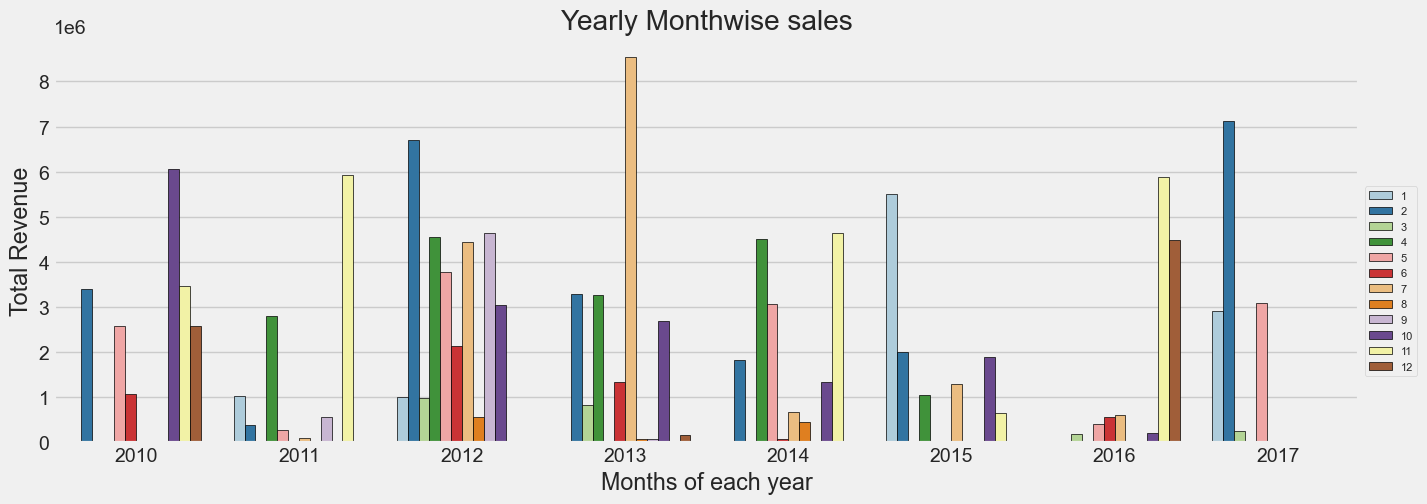

In [93]:
plt.figure(figsize=(15,5))
sns.barplot(y=yr_monthly_sales['Total Revenue'],hue=yr_monthly_sales['Ord_Mon'],x=yr_monthly_sales['Ord_Yr'],palette='Paired',edgecolor='k')
plt.xlabel('Months of each year')
plt.ylabel('Total Revenue')
plt.title('Yearly Monthwise sales')
plt.legend(bbox_to_anchor=(1.0, 0.15),loc='lower left',fontsize=8)
plt.show()

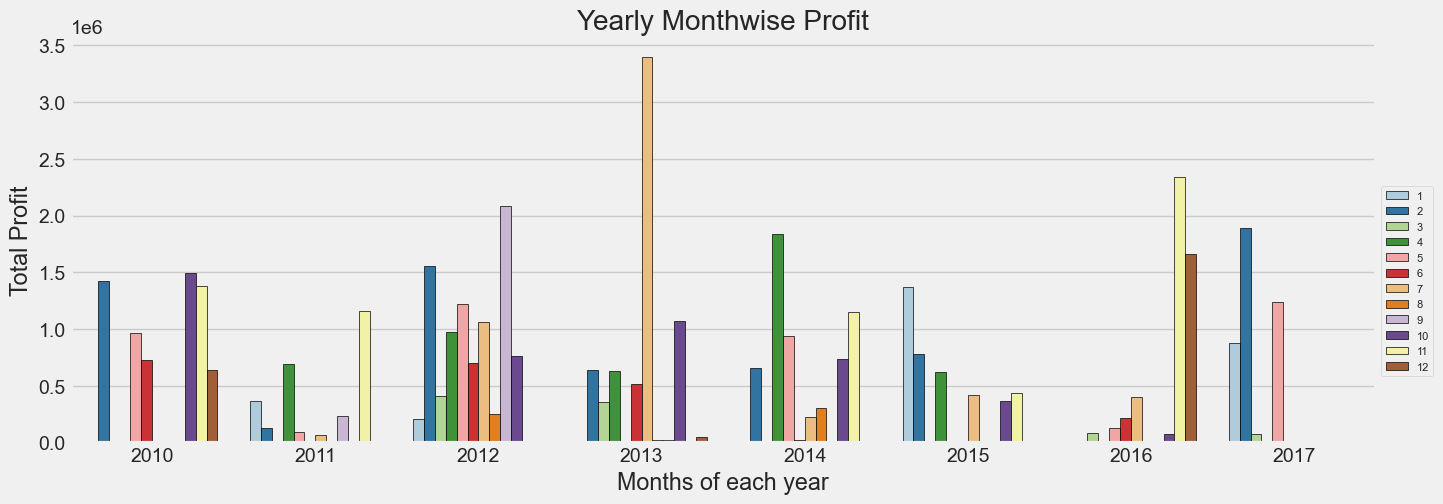

In [94]:
plt.figure(figsize=(15,5))
sns.barplot(y=yr_monthly_salesp['Total Profit'],hue=yr_monthly_salesp['Ord_Mon'],x=yr_monthly_salesp['Ord_Yr'],palette='Paired',edgecolor='k')
plt.xlabel('Months of each year')
plt.ylabel('Total Profit')
plt.title('Yearly Monthwise Profit')
plt.legend(bbox_to_anchor=(1.0, 0.15),loc='lower left',fontsize=8)
plt.show()

# Key Factors Analysis:

## Region Vs Revenue:

In [40]:
rev_region=pd.DataFrame(df.groupby('Region').agg('Total Revenue').sum().sort_values(ascending=False))
rev_region

,Total Revenue
Region,
Sub-Saharan Africa,39672031.43
Europe,33368932.11
Asia,21347091.02
Australia and Oceania,14094265.13
Middle East and North Africa,14052706.58
Central America and the Caribbean,9170385.49
North America,5643356.55


<AxesSubplot:title={'center':'Region vs Revenue impact'}, xlabel='Region', ylabel='Total Revenue'>

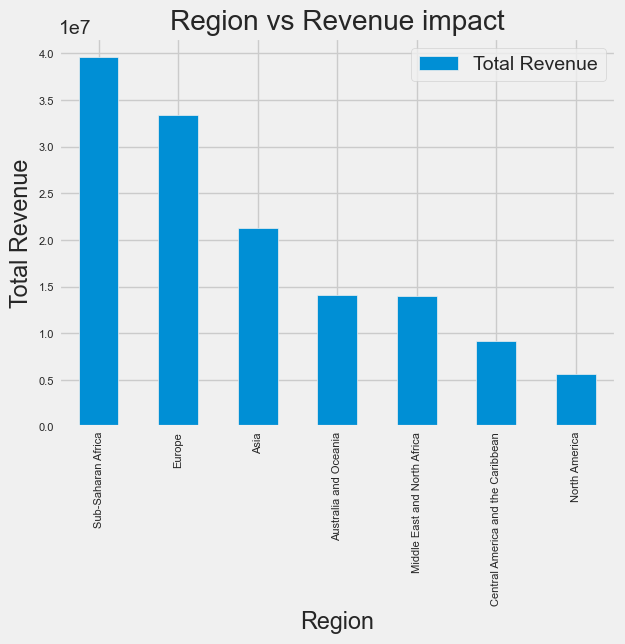

In [41]:
rev_region.plot(kind='bar',ylabel='Total Revenue',title='Region vs Revenue impact',fontsize=8)

Insights:
    Sub- Saharan Africa has the highest revenue of 39 million.
    North America has the lowest revenue of 5 million.
    Europe is found to be the second top in revenue of 33 million.

<AxesSubplot:ylabel='Country'>

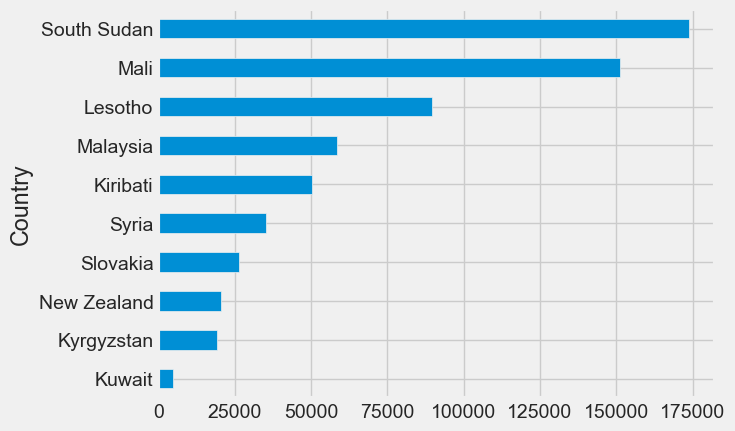

In [42]:
df.groupby('Country')['Total Revenue'].sum().sort_values().head(10).plot(kind='barh')

<AxesSubplot:ylabel='Country'>

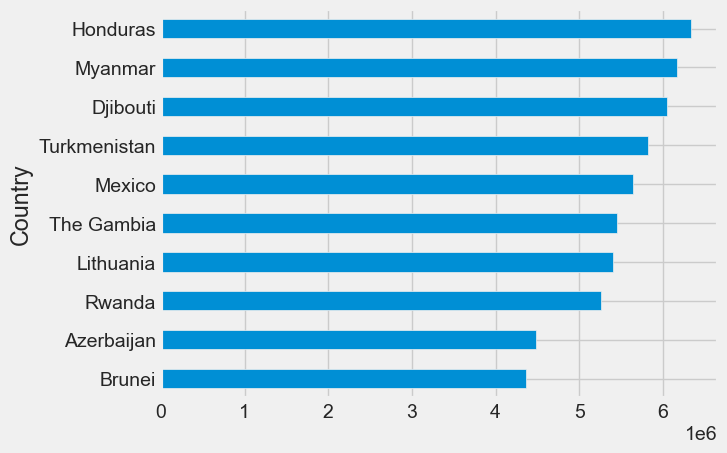

In [43]:
df.groupby('Country')['Total Revenue'].sum().sort_values().tail(10).plot(kind='barh')

## Revenue by product:

In [45]:
rev_pro=df[['Units Sold','Total Revenue','Item Type']].groupby('Item Type').sum().sort_values(ascending=False,by='Units Sold')
rev_pro

,Units Sold,Total Revenue
Item Type,,
Cosmetics,83718,36601509.60
Clothes,71260,7787292.80
Beverages,56708,2690794.60
Fruits,49998,466481.34
Personal Care,48708,3980904.84
Office Supplies,46967,30585380.07
Household,44727,29889712.29
Baby Food,40545,10350327.60
Cereal,25877,5322898.90


Insights:
    Maximum number of units sold are of Cosmetics followed by clothes.
    Least units sold are meat.

<AxesSubplot:title={'center':'Item Type vs Revenue'}, xlabel='Item Type', ylabel='Total Revenue'>

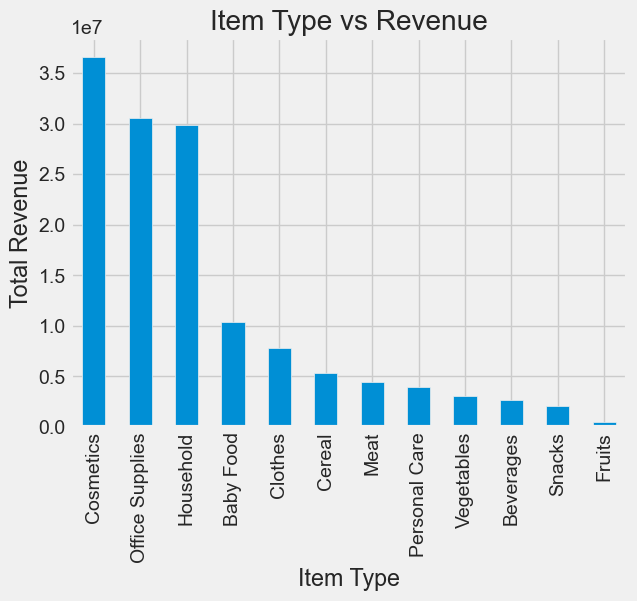

In [46]:
rev_pro.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).plot(kind='bar',ylabel='Total Revenue',title='Item Type vs Revenue')

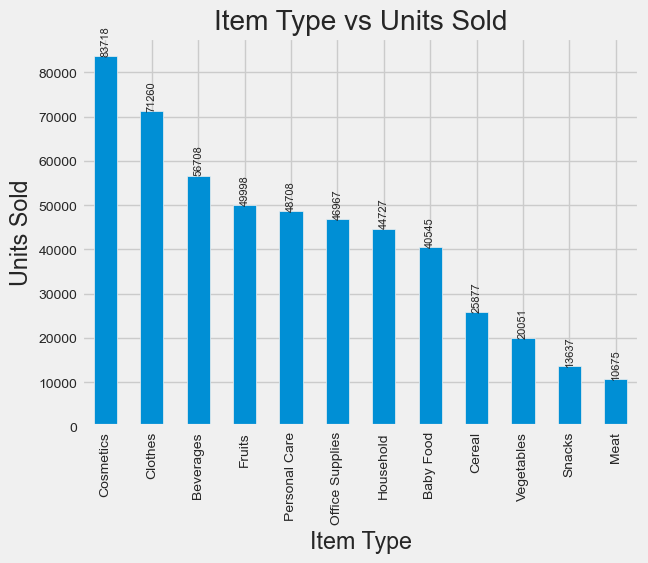

In [48]:
ax=df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar',xlabel='Item Type',ylabel='Units Sold',fontsize=10,title='Item Type vs Units Sold')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0],label_type='edge',rotation=90,fontsize=8)
plt.show()

## Revenue by Sales Channel:

In [50]:
df_saleschannel=df.groupby('Sales Channel')['Total Revenue'].sum().sort_values(ascending=False).reset_index()
df_saleschannel

,Sales Channel,Total Revenue
0,Offline,79094809.20
1,Online,58253959.11


In [51]:
df_reg_sc=df.groupby(['Region','Sales Channel'])['Total Revenue'].sum().reset_index()
df_reg_sc

,Region,Sales Channel,Total Revenue
0,Asia,Offline,12146097.76
1,Asia,Online,9200993.26
2,Australia and Oceania,Offline,4201867.85
3,Australia and Oceania,Online,9892397.28
4,Central America and the Caribbean,Offline,8254112.19
5,Central America and the Caribbean,Online,916273.30
6,Europe,Offline,18122486.45
7,Europe,Online,15246445.66
8,Middle East and North Africa,Offline,4993138.88
9,Middle East and North Africa,Online,9059567.70


## Order Priority vs Revenue:

In [52]:
df_ordpri=df.groupby('Order Priority')['Total Revenue'].sum().sort_values(ascending=False).reset_index()
df_ordpri

,Order Priority,Total Revenue
0,H,48749546.05
1,L,36628127.46
2,M,33116031.75
3,C,18855063.05


In [53]:
df_reg_op=df.groupby(['Region','Order Priority'])['Total Revenue'].sum().reset_index()
df_reg_op

,Region,Order Priority,Total Revenue
0,Asia,C,975510.65
1,Asia,H,6180361.34
2,Asia,L,7889242.53
3,Asia,M,6301976.50
4,Australia and Oceania,C,4190792.71
5,Australia and Oceania,H,7360582.96
6,Australia and Oceania,L,2492526.12
7,Australia and Oceania,M,50363.34
8,Central America and the Caribbean,C,963785.00
9,Central America and the Caribbean,H,6742480.98


## Item Type vs Sales:

In [54]:
df_item_unc=df[['Item Type','Unit Cost']].drop_duplicates()
df_item_unc

,Item Type,Unit Cost
0,Baby Food,159.42
1,Cereal,117.11
2,Office Supplies,524.96
3,Fruits,6.92
6,Household,502.54
7,Vegetables,90.93
8,Personal Care,56.67
11,Clothes,35.84
16,Cosmetics,263.33
17,Beverages,31.79


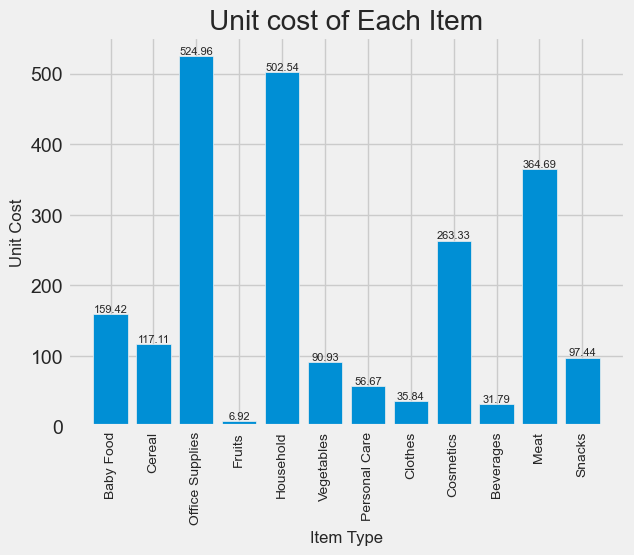

In [55]:
fig,ax=plt.subplots()
p=ax.bar(x=df_item_unc['Item Type'],height=df_item_unc['Unit Cost'])
plt.xticks(rotation=90,fontsize=10)
ax.bar_label(p,fontsize=8)
plt.title('Unit cost of Each Item')
plt.xlabel('Item Type',fontsize=12)
plt.ylabel('Unit Cost',fontsize=12)
plt.show()

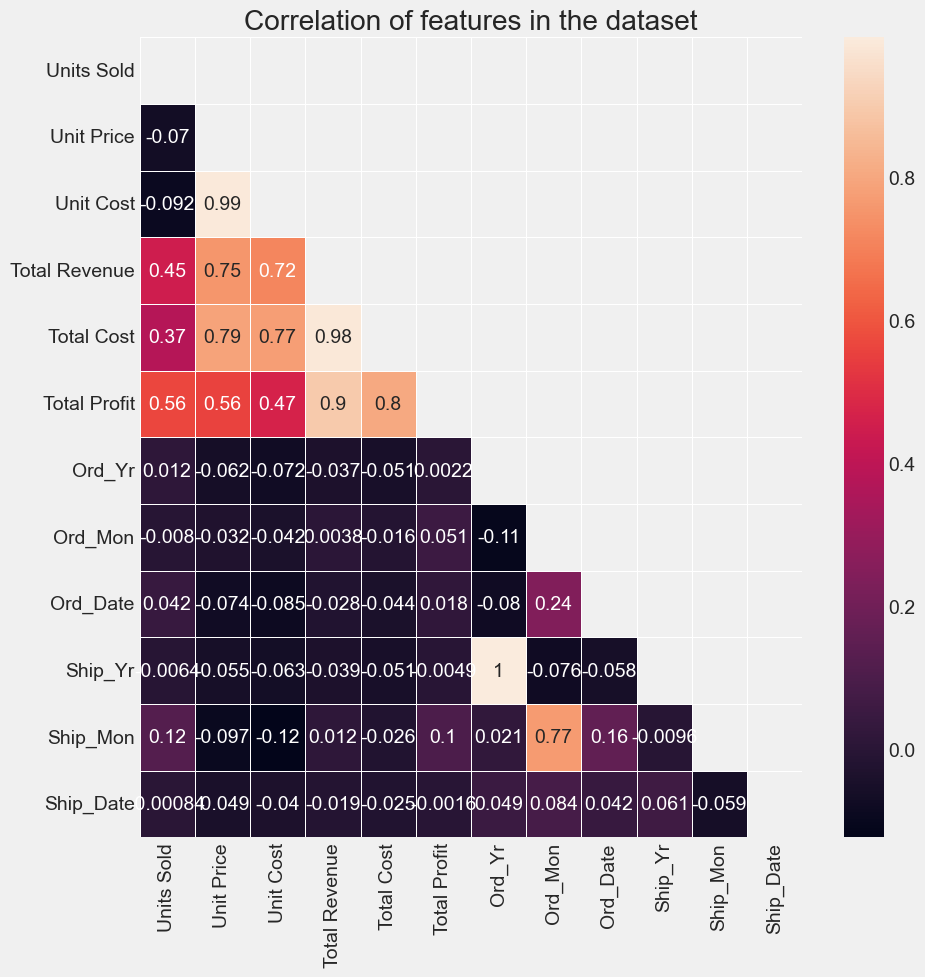

In [56]:
plt.figure(figsize=(10,10))
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),annot=True,mask=mask,linewidths=0.5)
plt.title('Correlation of features in the dataset')
plt.tight_layout()
plt.show()

In [57]:
df.drop(['Order Date','Ship Date'],axis=1,inplace=True)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Ord_Yr,Ord_Mon,Ord_Date,Ship_Yr,Ship_Mon,Ship_Date
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28,2010,6,27
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22,2012,9,15
2,Europe,Russia,Office Supplies,Offline,L,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,2014,5,8
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20,2014,7,5
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1,2013,2,6


# Conclusion: